<a href="https://colab.research.google.com/github/guupys/Colab-notebook/blob/main/Spline_Scipy_interplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy.interplate

## 1D data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y, kind='linear') # default if kind=None
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='nearest')

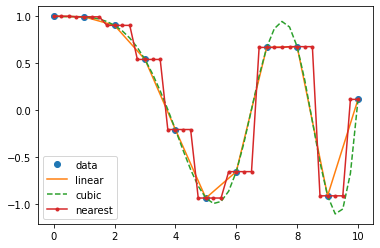

In [ ]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '.-')
plt.legend(['data', 'linear', 'cubic', 'nearest'], loc='best')
plt.show()

In [ ]:
from scipy.interpolate import griddata

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

## nD data

In [ ]:
from scipy.interpolate import griddata

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [ ]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] 

In [ ]:
np.info(np.mgrid)

In [ ]:
# A random sampling within the same area

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

# Resample from the values at these points onto the regular mesh

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

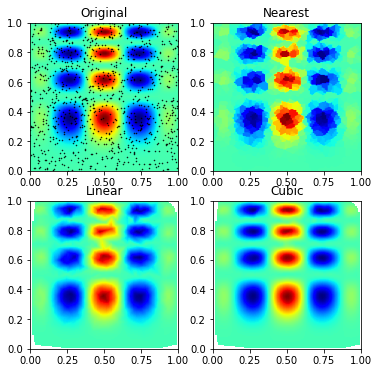

In [ ]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower', cmap='jet')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## Spline

In [ ]:
from scipy.interpolate import splrep, splev

In [ ]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = splev(xnew, tck, der=0)
yder = splev(xnew, tck, der=1)

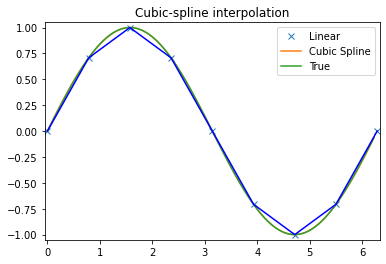

In [ ]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

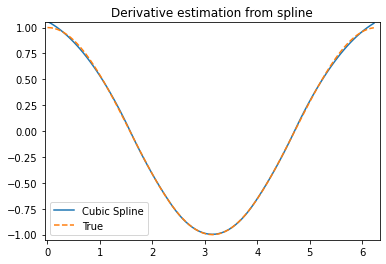

In [ ]:
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

## 2D spline

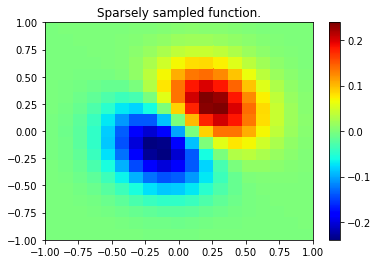

In [ ]:
from scipy.interpolate import bisplrep, bisplev

# Gridded function (at low resolution ... doesn't need to be gridded data here)

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

plt.figure()
plt.pcolor(x, y, z, cmap='jet')
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

In [ ]:
xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]

## Create the spline-representation object tck

tck = bisplrep(x, y, z, s=0)
znew = bisplev(xnew[:,0], ynew[0,:], tck)

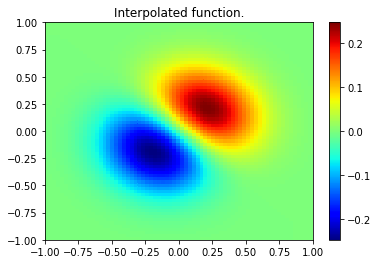

In [ ]:
plt.figure()
plt.pcolor(xnew, ynew, znew, cmap='jet')
plt.colorbar()
plt.title("Interpolated function.")
plt.show()